<a href="https://colab.research.google.com/github/Manoj00709/EDA-project/blob/main/Prjt_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Insurance
![](https://miro.medium.com/v2/resize:fit:750/1*8vHIc6_KjyGPEHvK9REMWQ.jpeg)

In [2]:
pip install pandas scikit-learn matplotlib seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
df = pd.read_csv('/content/sample_data/insurance_dataset.csv')

print(df.head())


    Age  Gender    Income Marital_Status   Education Occupation  Claim_Amount
0  59.0    Male  270727.0         Single    Master's     Doctor        3455.0
1  21.0  Female  263874.0         Single  Bachelor's   Engineer       30233.0
2  71.0  Female   48372.0         Single  Bachelor's   Engineer         340.0
3  30.0  Female   99525.0         Single         PhD        CEO        1002.0
4  64.0  Female  187038.0        Married    Master's        CEO        2828.0


In [5]:
print(df.isnull().sum())



Age               0
Gender            0
Income            0
Marital_Status    0
Education         0
Occupation        0
Claim_Amount      0
dtype: int64


In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
df_encoded

,Age,Income,Claim_Amount,Gender_Male,Marital_Status_Single,Education_Master's,Education_PhD,Occupation_Doctor,Occupation_Engineer,Occupation_Teacher,Occupation_Waiter
0,59.0,270727.0,3455.0,True,True,True,False,True,False,False,False
1,21.0,263874.0,30233.0,False,True,False,False,False,True,False,False
2,71.0,48372.0,340.0,False,True,False,False,False,True,False,False
3,30.0,99525.0,1002.0,False,True,False,True,False,False,False,False
4,64.0,187038.0,2828.0,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
12995,53.0,128164.0,5249.0,False,True,False,True,False,False,False,False
12996,41.0,257518.0,3981.0,False,False,False,False,False,False,False,False
12997,25.0,79060.0,2956.0,False,False,False,False,False,False,False,False
12998,42.0,190633.0,4029.0,False,True,True,False,False,False,False,False


In [8]:
print(df_encoded.head())


    Age    Income  Claim_Amount  Gender_Male  Marital_Status_Single  \
0  59.0  270727.0        3455.0         True                   True   
1  21.0  263874.0       30233.0        False                   True   
2  71.0   48372.0         340.0        False                   True   
3  30.0   99525.0        1002.0        False                   True   
4  64.0  187038.0        2828.0        False                  False   

   Education_Master's  Education_PhD  Occupation_Doctor  Occupation_Engineer  \
0                True          False               True                False   
1               False          False              False                 True   
2               False          False              False                 True   
3               False           True              False                False   
4                True          False              False                False   

   Occupation_Teacher  Occupation_Waiter  
0               False              False  
1     

In [9]:
df_encoded.Age.describe()

,Age
count,13000.000000
mean,51.530308
std,20.965770
min,18.000000
25%,34.000000
50%,51.000000
75%,67.000000
max,102.421544


In [10]:
fig = px.histogram(df_encoded,
                   x = 'Age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

<Axes: xlabel='Claim_Amount', ylabel='Count'>

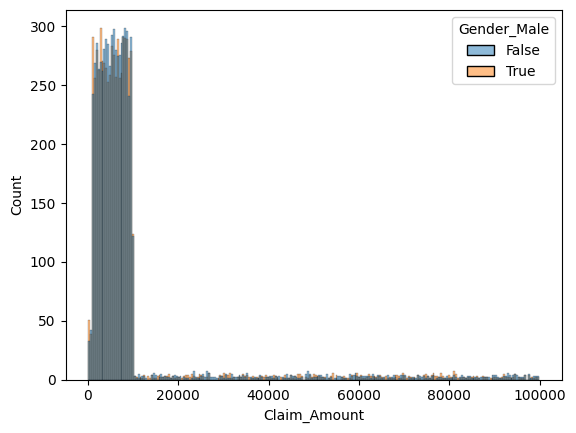

In [11]:
sns.histplot(df_encoded, x='Claim_Amount',hue='Gender_Male')

In [12]:
X = df_encoded.drop('Claim_Amount', axis=1)
y = df_encoded['Claim_Amount']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
fig = px.histogram(df_encoded,
             x='Income',

             title = 'Annual Income',
             color='Occupation_Doctor')
fig.update_layout(bargap=0.05)
fig.show()

In [15]:
fig = px.histogram(df_encoded,
             x='Income',

             title = 'Annual Income',
             color='Occupation_Engineer')
fig.update_layout(bargap=0.05)
fig.show()

In [16]:
fig = px.histogram(df_encoded,
             x='Income',

             title = 'Annual Income',
             color='Occupation_Teacher')
fig.update_layout(bargap=0.05)
fig.show()

In [17]:
fig = px.histogram(df_encoded,
             x='Income',

             title = 'Annual Income',
             color='Occupation_Waiter')
fig.update_layout(bargap=0.05)
fig.show()

In [18]:
px.histogram(df_encoded, x='Income',color='Gender_Male')

In [19]:
px.scatter(df_encoded,
           x ='Age',
           y = 'Claim_Amount',
           color='Income',
           title = 'Age VS claim amt')

In [20]:

px.scatter(df_encoded,
           x ="Education_Master's",
           y = 'Education_PhD',
           color='Income',
           title = 'Masters VS Phd')

In [21]:
df_encoded.Income.corr(df_encoded.Age)

-0.0016502786492046456

In [22]:
df_encoded.Income.corr(df_encoded.Claim_Amount)

0.02480630811942161

In [23]:
df_encoded.corr()

,Age,Income,Claim_Amount,Gender_Male,Marital_Status_Single,Education_Master's,Education_PhD,Occupation_Doctor,Occupation_Engineer,Occupation_Teacher,Occupation_Waiter
Age,1.000000,-0.001650,0.006490,-0.002565,-0.008163,-0.001955,0.003208,-0.011468,-0.002806,-0.006727,0.000460
Income,-0.001650,1.000000,0.024806,0.006615,-0.003236,-0.001421,0.001346,-0.080824,-0.061045,-0.082465,-0.053872
Claim_Amount,0.006490,0.024806,1.000000,-0.003482,-0.000131,0.008110,-0.007409,0.191905,0.188018,0.159131,0.196275
Gender_Male,-0.002565,0.006615,-0.003482,1.000000,-0.006141,-0.000871,0.014739,-0.005061,0.001070,-0.008687,-0.000481
Marital_Status_Single,-0.008163,-0.003236,-0.000131,-0.006141,1.000000,0.001665,-0.007127,-0.004048,-0.002954,-0.001549,0.007345
Education_Master's,-0.001955,-0.001421,0.008110,-0.000871,0.001665,1.000000,-0.503228,-0.004098,-0.009389,0.006389,0.008691
Education_PhD,0.003208,0.001346,-0.007409,0.014739,-0.007127,-0.503228,1.000000,-0.014062,0.004249,-0.015897,-0.004018
Occupation_Doctor,-0.011468,-0.080824,0.191905,-0.005061,-0.004048,-0.004098,-0.014062,1.000000,-0.050801,-0.048568,-0.048830
Occupation_Engineer,-0.002806,-0.061045,0.188018,0.001070,-0.002954,-0.009389,0.004249,-0.050801,1.000000,-0.048934,-0.049198
Occupation_Teacher,-0.006727,-0.082465,0.159131,-0.008687,-0.001549,0.006389,-0.015897,-0.048568,-0.048934,1.000000,-0.047035


<Axes: >

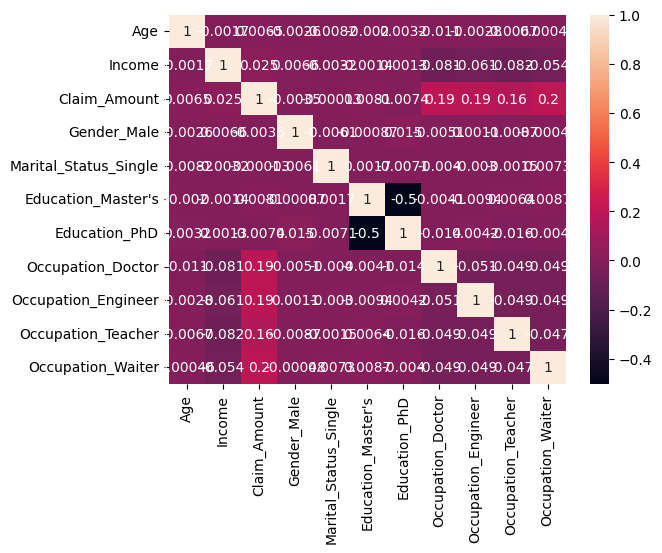

In [24]:
sns.heatmap(df_encoded.corr(), annot=True)

In [25]:
def estimate_charges(Age, w, b):
  return w * Age + b

In [26]:
w = 50
b = 100

In [27]:
ages = X.Age
estimated_charges = estimate_charges(ages, w, b)

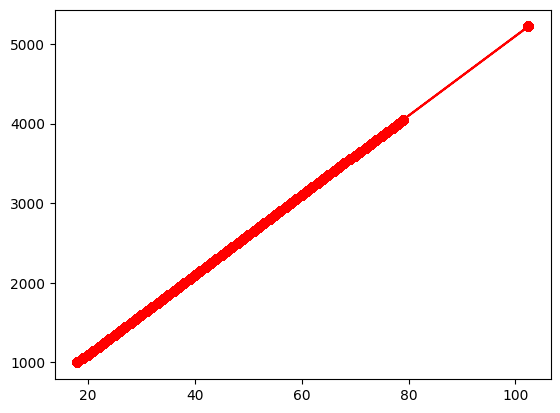

In [28]:
plt.plot(ages,estimated_charges, 'r-o')

In [29]:
fig  = px.scatter_3d(df_encoded, x='Age',y='Income',z='Claim_Amount')
fig.update_traces(marker_size = 4)
fig.show()